# Part1. Exploratory Data Analysis

In [44]:
# for csv reading
import pandas as pd 

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for normalization
from sklearn.preprocessing import StandardScaler


In [ ]:
#  read and check the data
df = pd.read_csv("../data/College_Admissions.csv")
df.head()      

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()
# this results shows no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [17]:
# we don't need the index column
df = df.drop(columns=["Serial No."])
# standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # standardize names

In [23]:
df.describe() 

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## distribution of key numerical features in  dataset

1. See features distribution
2. Spot Potential Outliers

In [29]:
features = df.columns.tolist()
print(features)
print(len(features))

['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admit']
8


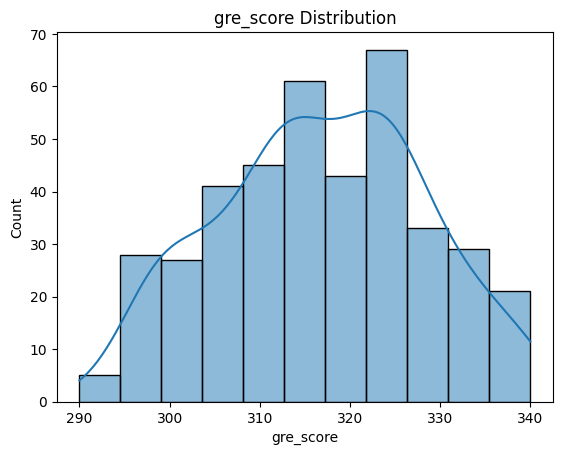

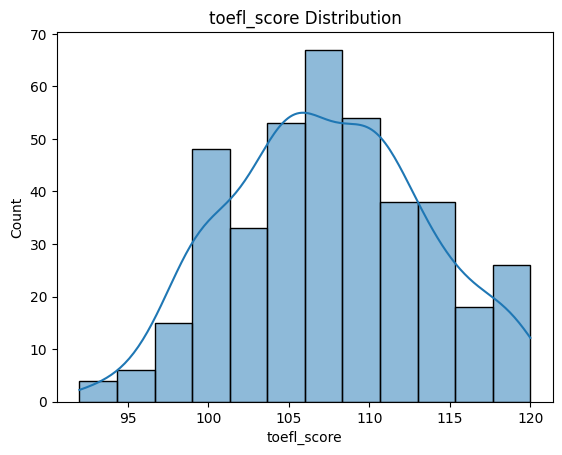

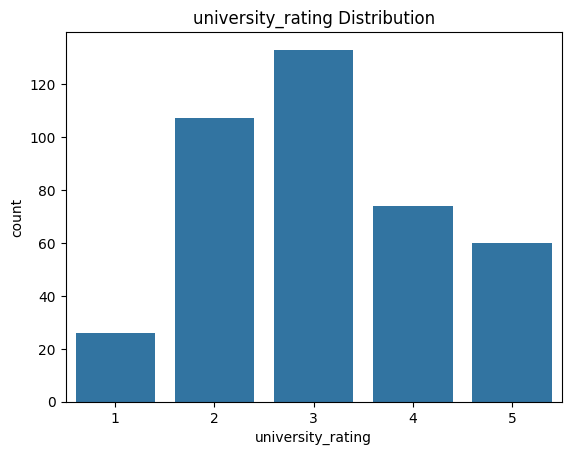

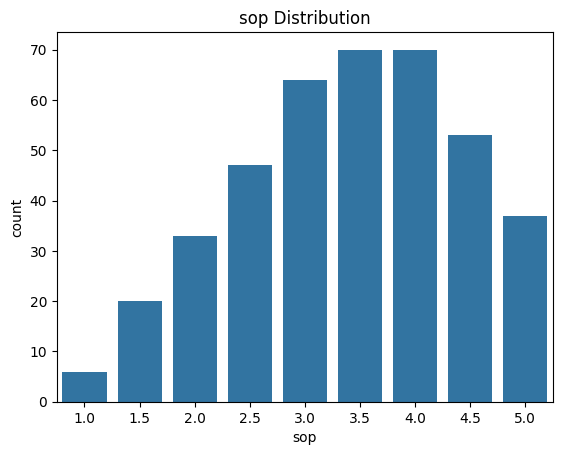

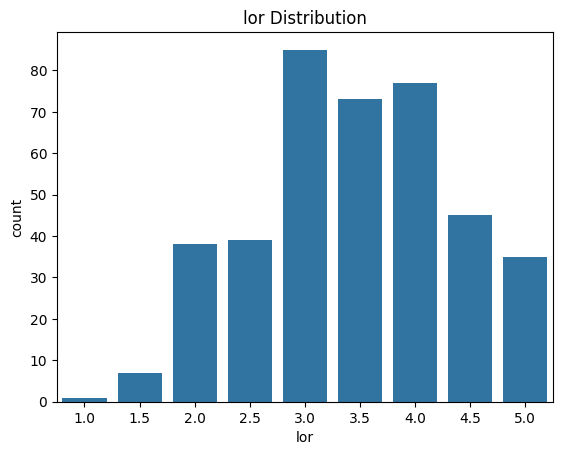

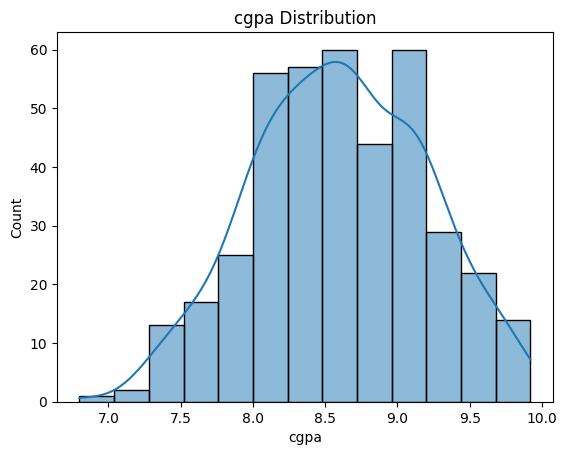

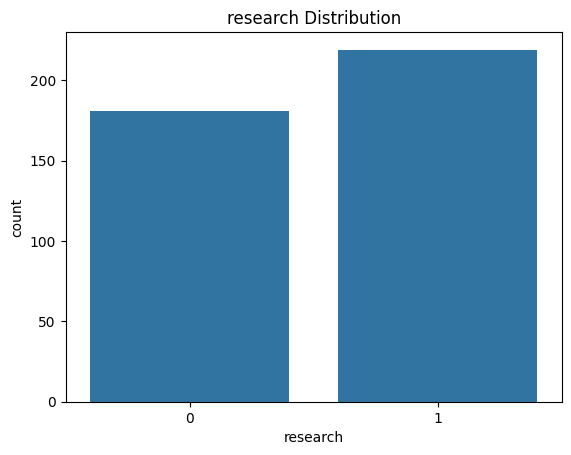

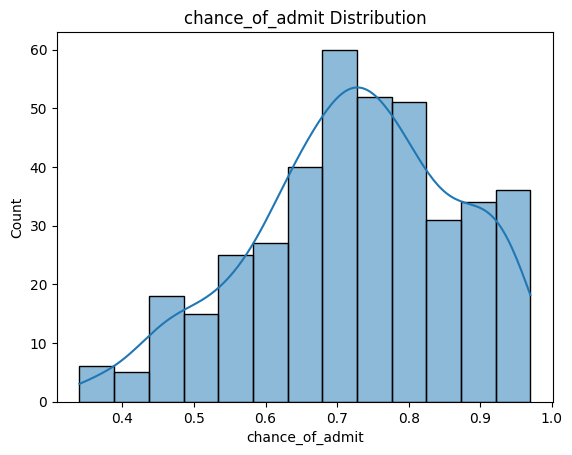

In [36]:
for feature in df.columns:
    plt.figure()
    if df[feature].nunique() < 15:
        # for discrete features
        sns.countplot(x=feature, data=df)
    else:
        # for continuous features
        sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} Distribution")
    # plt.xticks(rotation=45)
    plt.show()


The dataset is clean, with no missing values and all features well-distributed. Most variables follow reasonable patterns that align with expectations for graduate school applicants

## Identify which features are most correlated with the target

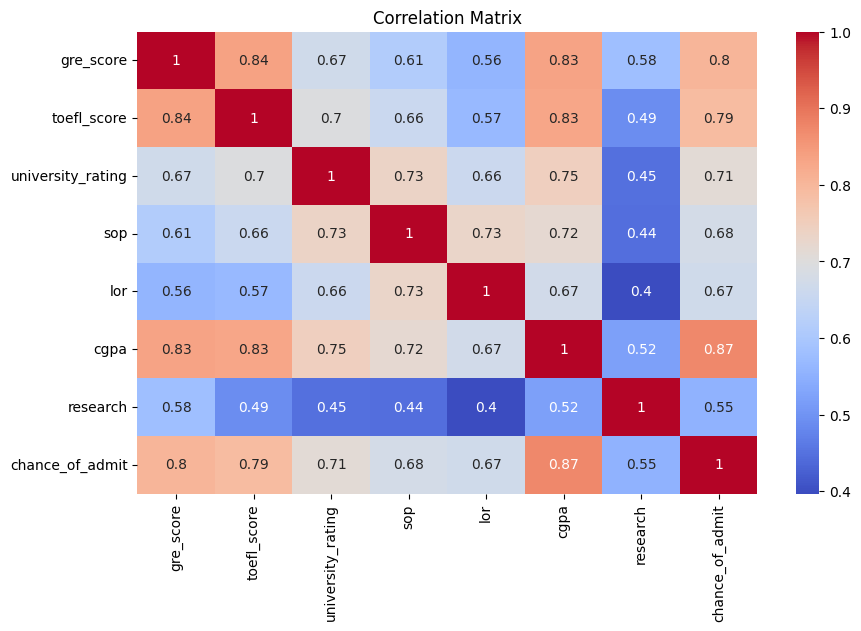

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The target variable `chance_of_admit` is most strongly correlated with `CGPA` (0.87), followed by `GRE Score` (0.80) and `TOEFL Score` (0.79). Other moderate contributors include `University Rating`, `SOP`, and `LOR`. Research experience has a weaker correlation (0.55) but is still a relevant feature.

High inter-feature correlations (like GRE-TOEFL-CGPA) suggest potential multicollinearity, which will be addressed in modeling via PCA

## Pairplot: pairwise relationships between features

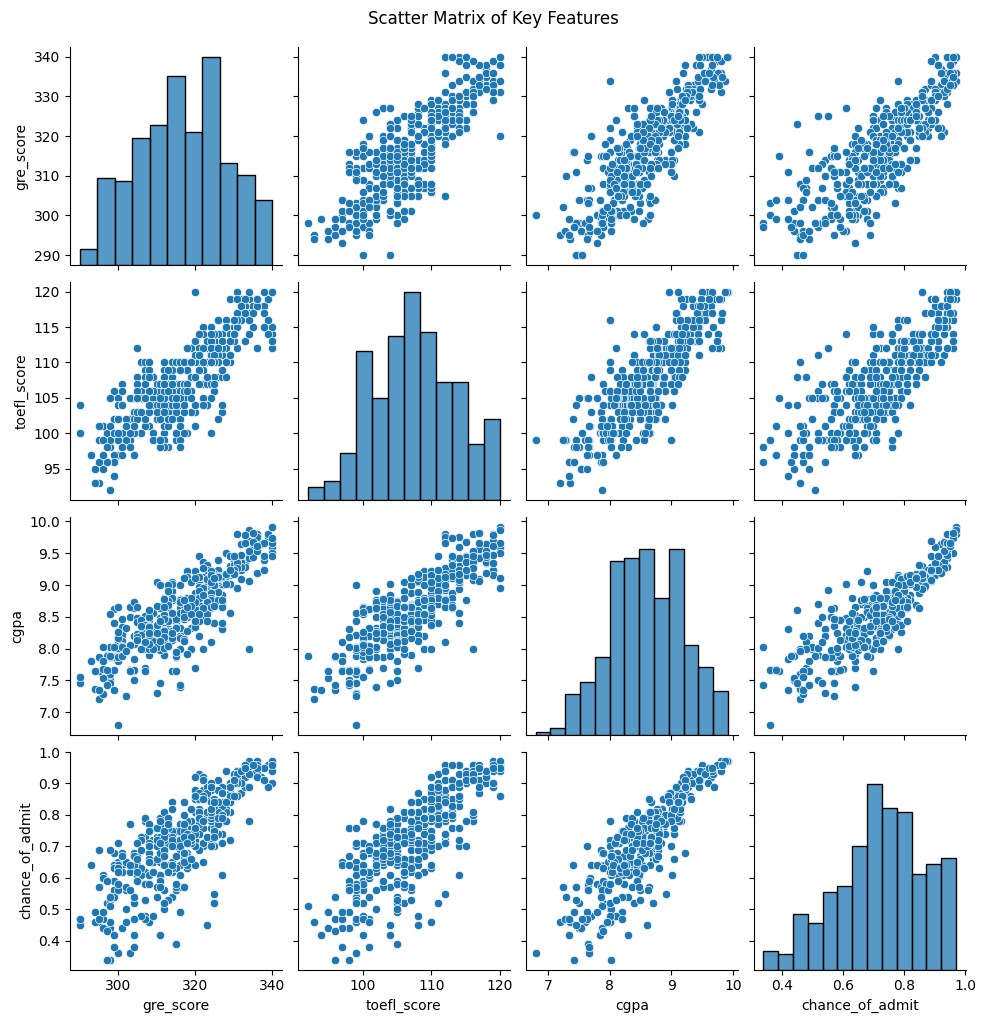

In [ ]:
sns.pairplot(df[["gre_score", "toefl_score", "cgpa", "chance_of_admit"]]) # only the features of continuous variables
plt.suptitle("Scatter Matrix of Key Features", y=1.02)
plt.show()



The pairwise scatterplots show strong linear relationships between academic features (GRE, TOEFL, CGPA) and the target variable `chance_of_admit`. Among these, `CGPA` has the most compact and linear association with admission probability, making it the most informative single predictor. However, high inter-feature correlation (GRE–TOEFL–CGPA) suggests potential multicollinearity, which should be addressed during modeling.

#  feature scaling

In [45]:
features_to_scale = ["gre_score", "toefl_score", "university_rating", "sop", "lor", "cgpa", "research"]

X = df[features_to_scale]
y = df["chance_of_admit"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Returns numpy array

df_scaled = pd.DataFrame(X_scaled, columns=features_to_scale)
df_scaled["chance_of_admit"] = y  # Add back the unscaled target

In [ ]:
# check mean and std after scaling
df_scaled.describe() 

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000
mean,-4.174439e-16,5.595524e-16,7.105427e-17,7.993606e-17,-1.332268e-16,7.771561e-16,-3.996803e-17,0.724350
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,0.142609
min,-2.339367e+00,-2.542098e+00,-1.827457e+00,-2.386613e+00,-2.733036e+00,-3.020504e+00,-1.099975e+00,0.340000
25%,-7.685900e-01,-7.274920e-01,-9.520286e-01,-8.949798e-01,-5.042604e-01,-7.201909e-01,-1.099975e+00,0.640000
50%,1.679859e-02,-6.763531e-02,-7.660001e-02,9.944220e-02,5.293342e-02,1.859559e-02,9.091117e-01,0.730000
75%,7.149218e-01,7.571856e-01,7.988286e-01,5.966532e-01,6.101273e-01,7.783704e-01,9.091117e-01,0.830000
max,2.023903e+00,2.076899e+00,1.674257e+00,1.591075e+00,1.724515e+00,2.218165e+00,9.091117e-01,0.970000


In [48]:
# save the scaled data
df_scaled.to_csv("../data/admission_data_standardized.csv", index=False)